# PIMA diabetes Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import apply_scaling

In [2]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
target = "Outcome"

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Plot the amount of rows in each side of the target

#### Looks like the target is imbalanced so this needs to be taken into account

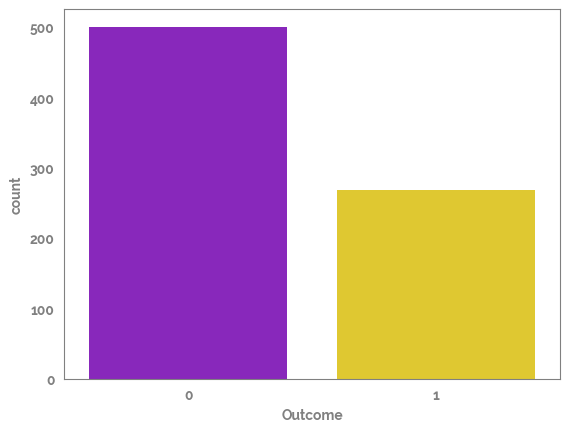

In [7]:
_ = sns.countplot(x=df[target])

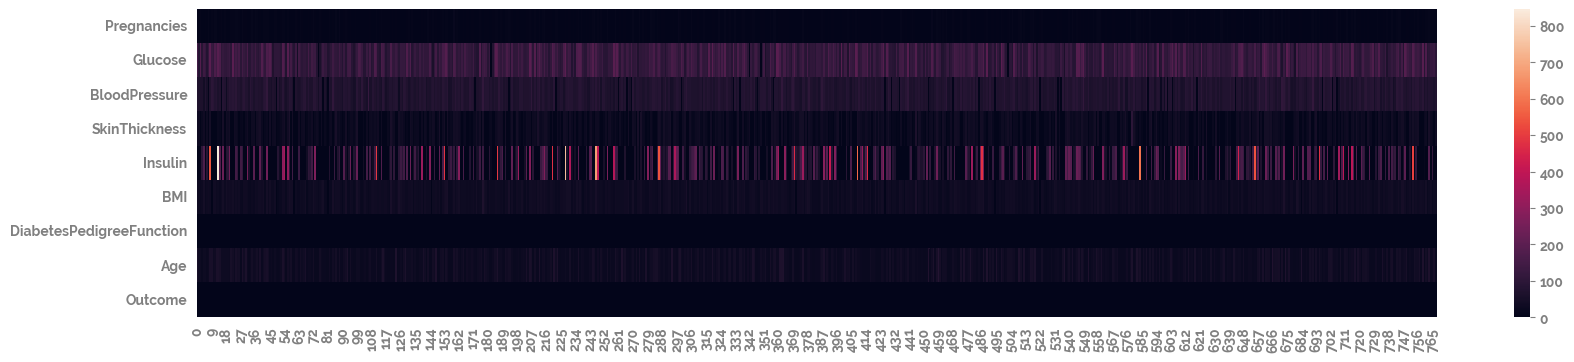

In [8]:
_ = plt.figure(figsize=(20, 4))
_ = sns.heatmap(df.T)

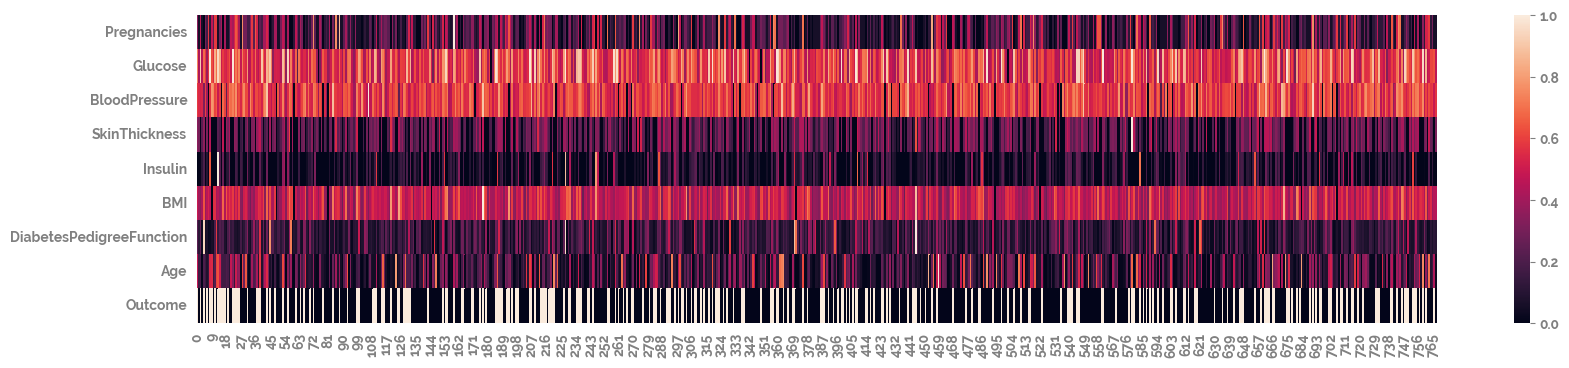

In [9]:
_ = plt.figure(figsize=(20, 4))
_ = sns.heatmap(df
                .pipe(apply_scaling)
                .T)

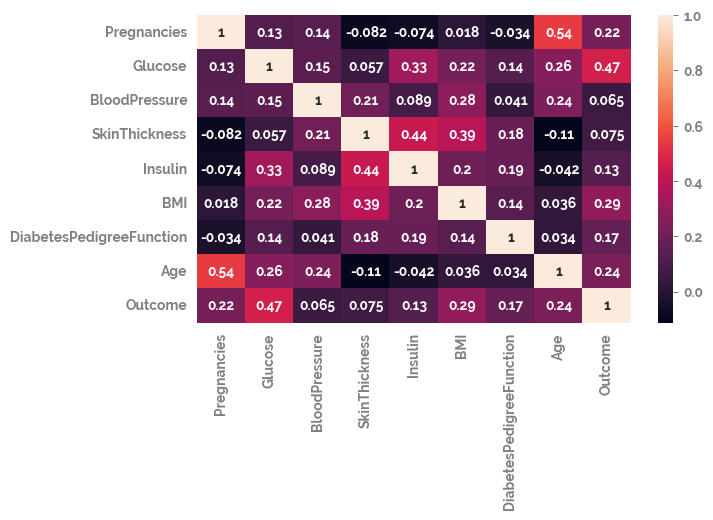

In [10]:
_ = plt.figure(figsize=(7, 4))
_ = sns.heatmap(df.corr(), annot=True)

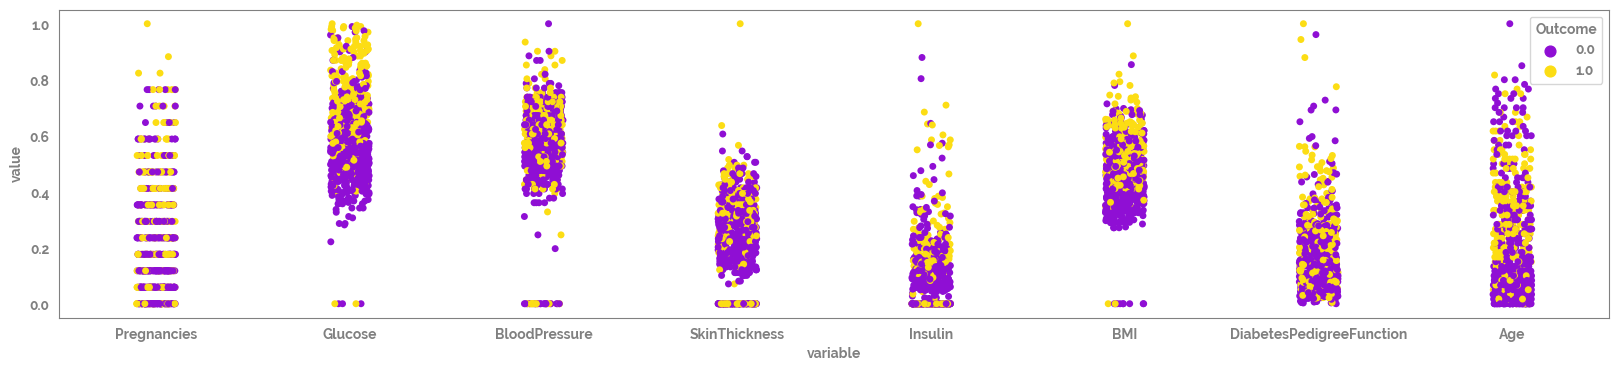

In [11]:
_ = plt.figure(figsize=(20, 4))
_ = sns.stripplot(data=df
                .pipe(apply_scaling, "MinMax")
                .melt(id_vars = target),
                x = "variable",
                y = "value",
                hue = target,)

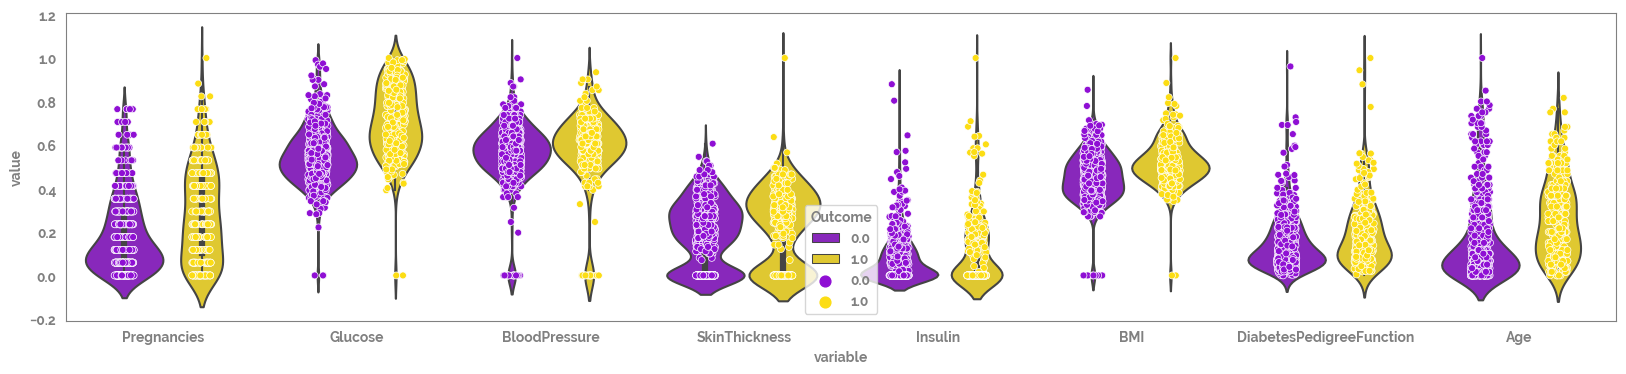

In [12]:
_ = plt.figure(figsize=(20, 4))
_ = sns.violinplot(data=df
                .pipe(apply_scaling, "MinMax")
                .melt(id_vars = target),
                x = "variable",
                y = "value",
                hue = target,
               )
_ = sns.stripplot(data=df
                .pipe(apply_scaling, "MinMax")
                .melt(id_vars = target),
                x = "variable",
                y = "value",
                hue = target,
                edgecolor='white',
    linewidth=0.5,
                  dodge=True
               )

#### Looking at the scatter plots there seems like there may be some missing values with default value = 0, that need to be removed prior to analysis (e.g. BMI).

In [13]:
tmp = (df
       .drop(target, axis=1)
       .replace(0, np.nan)
       .merge(df[target], left_index=True, right_index=True)
       .pipe(apply_scaling, "MinMax")
       .melt(id_vars = target)
      )

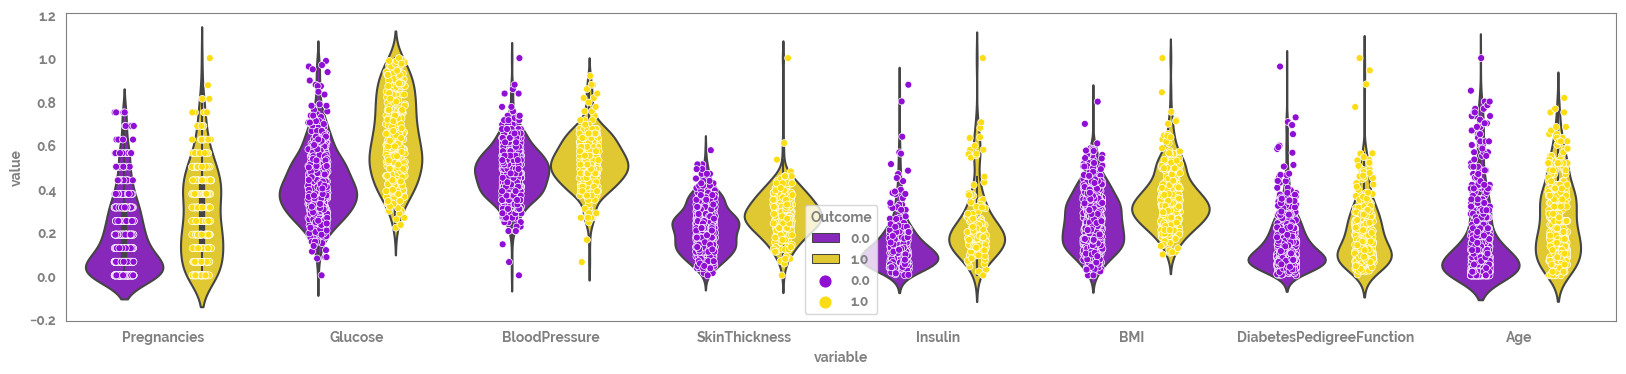

In [14]:
_ = plt.figure(figsize=(20, 4))
_ = sns.violinplot(data=tmp,
                x = "variable",
                y = "value",
                hue = "Outcome",
               )

_ = sns.stripplot(data=tmp,
                x = "variable",
                y = "value",
                hue = target,
                edgecolor='white',
    linewidth=0.5,
                  dodge=True
               )